In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Step 2: Loading Dataset

In [3]:
dataset = pd.read_csv("dataset/parkinsons.csv")
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
dataset.shape

(195, 24)

Step 3: Data Preprocessing & EDA

In [5]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Axes: xlabel='status', ylabel='count'>

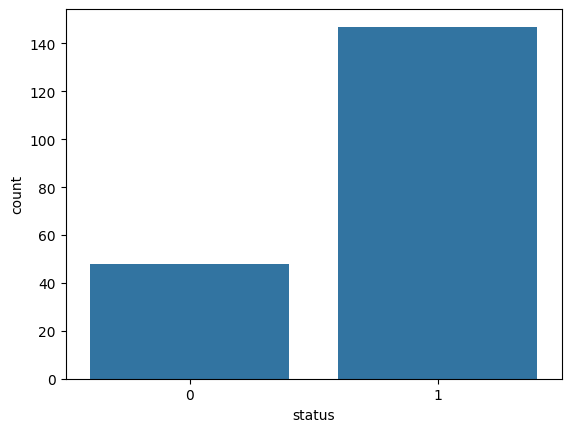

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="status", data=dataset)

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

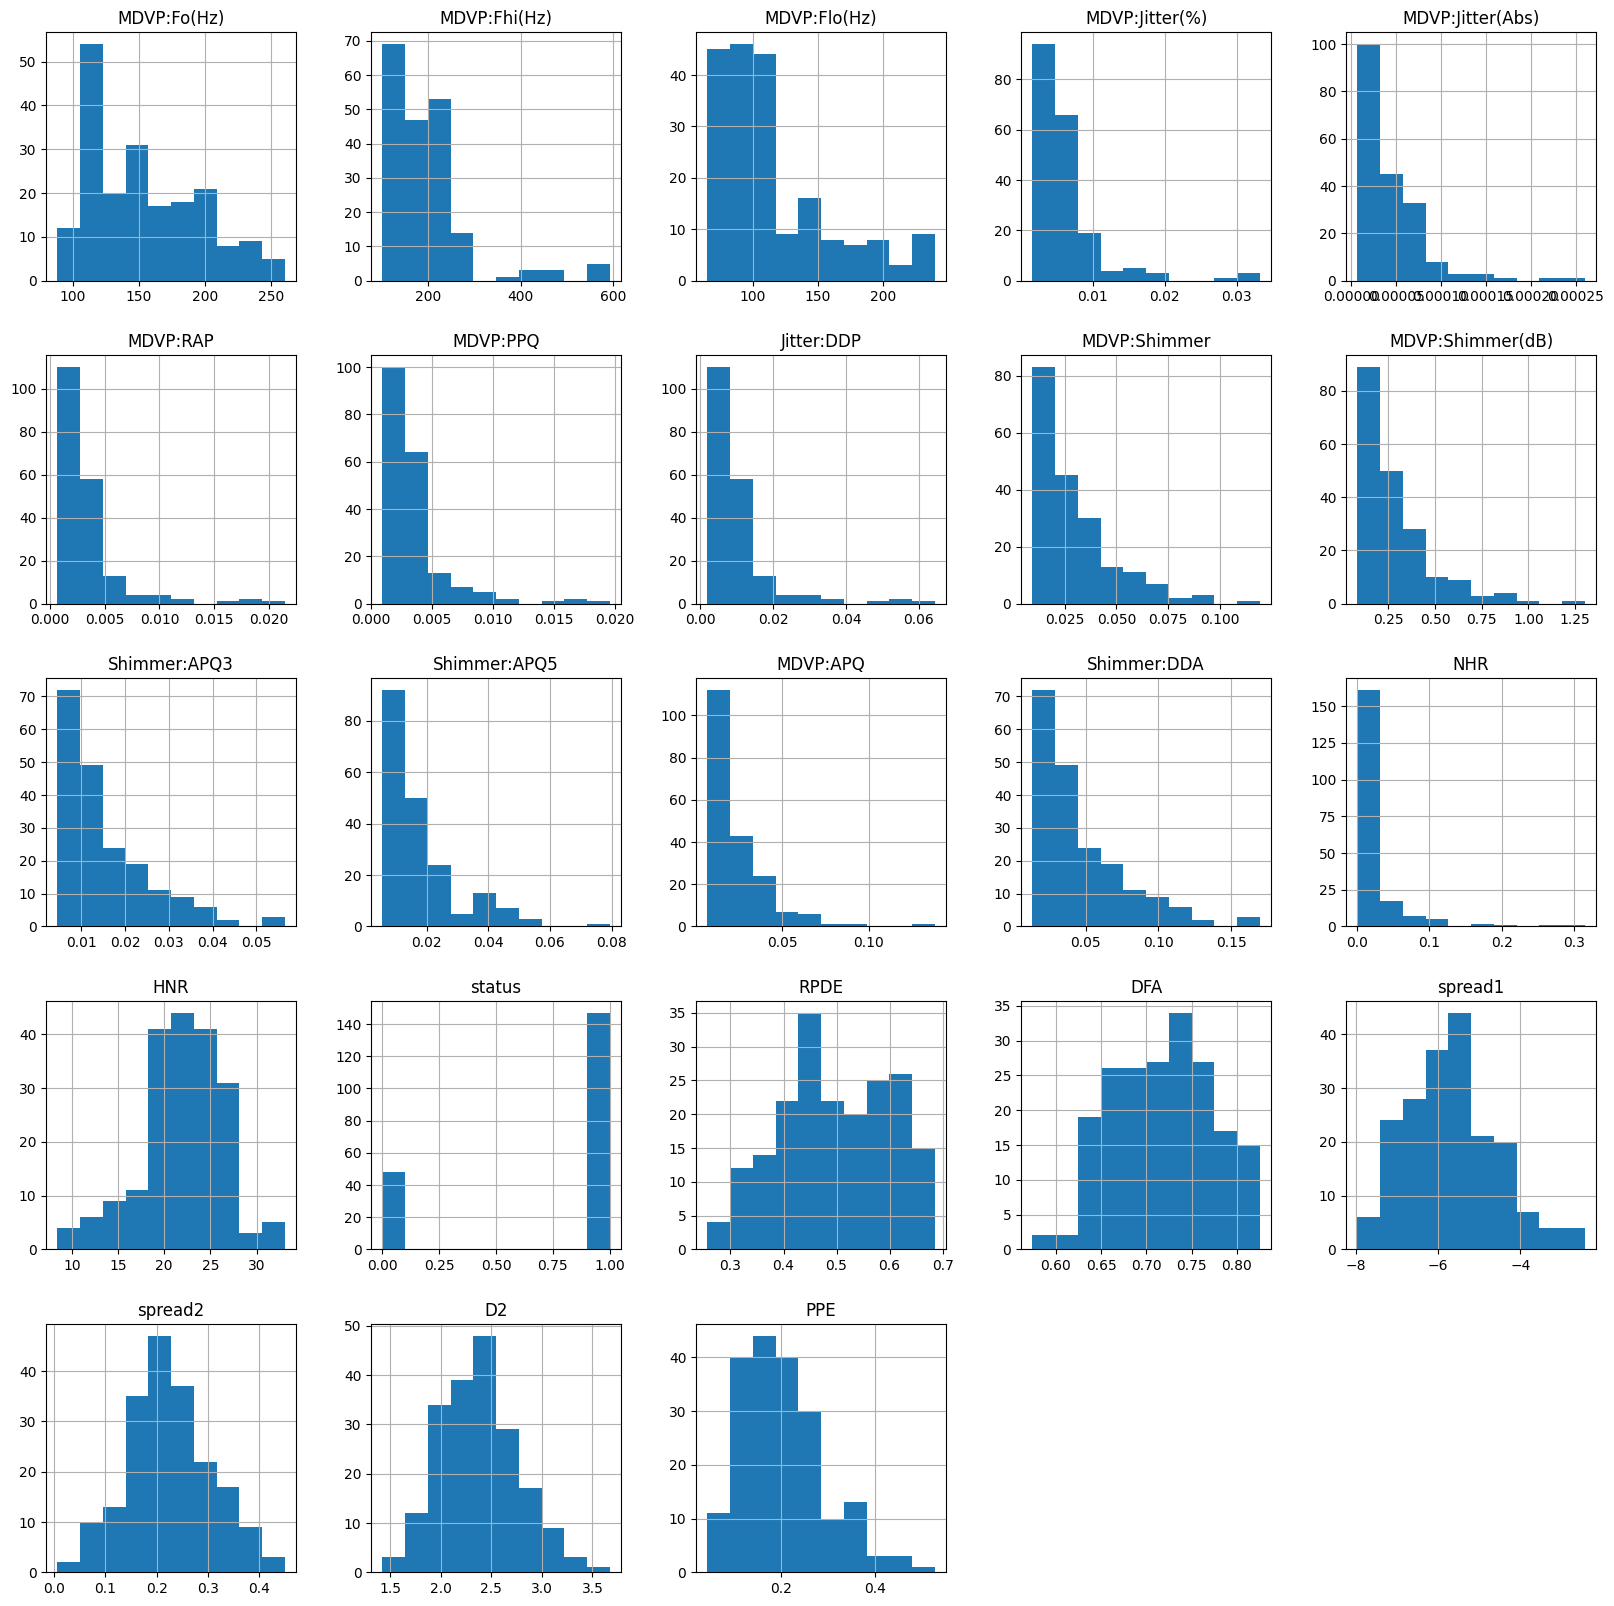

In [8]:
dataset.hist(figsize=(20,20))

Step 4: Training the model

In [9]:
X =  dataset.drop(columns=["name","status"],axis = 0)
y = dataset["status"]
print(X.head())
print(y.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
5        120.552       131.162       113.787         0.00968   
135      110.453       127.611       105.554         0.00494   
122      138.190       203.522        83.340         0.00704   
167      260.105       264.919       237.303         0.00339   
85       180.978       200.125       155.495         0.00406   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
5             0.00008   0.00463   0.00750     0.01388       0.04701   
135           0.00004   0.00244   0.00315     0.00731       0.04128   
122           0.00005   0.00406   0.00398     0.01218       0.04479   
167           0.00001   0.00205   0.00186     0.00616       0.02030   
85            0.00002   0.00220   0.00244     0.00659       0.03852   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
5               0.456  ...   0.03243      0.06985  0.01222  21.378  0.415564   
135             0.379  ...  

In [11]:
scaler = StandardScaler() 

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print(X_train)
print(X_test)

[[-0.80172872 -0.70830513 -0.10603303 ...  0.89854281 -0.48294197
   1.64980971]
 [-1.04374224 -0.74950432 -0.29919921 ...  1.17531845  0.65177741
   0.26864313]
 [-0.3790498   0.13122544 -0.82039362 ... -0.7771489  -0.73102398
   0.28542547]
 ...
 [-0.13744368 -0.31583967  0.56292775 ... -1.65126173 -0.08248373
  -0.17764131]
 [-0.14053505 -0.42034011  0.39263744 ...  0.19569946  1.19665768
  -0.11105606]
 [-0.35427092  4.57536567 -1.22354854 ...  0.55494177  0.80279984
   2.57800238]]
[[-1.00094234e+00 -7.61129656e-01 -3.33430899e-01 -2.67903948e-01
  -8.37831615e-02 -2.73907813e-01 -1.79605186e-01 -2.72956229e-01
   1.32697546e+00  1.11619250e+00  1.39922326e+00  1.33789355e+00
   1.11666351e+00  1.39955044e+00  2.45567692e-02 -9.70699528e-01
   1.37623734e+00 -3.79194673e-01  1.03265999e-01  9.81854292e-01
   1.08879298e-01  6.45664184e-02]
 [-2.35313090e-01  1.82208595e+00 -8.33907977e-01 -1.29884631e-01
  -8.37831615e-02 -3.58316629e-01 -1.72916619e-01 -3.59448257e-01
  -4.854283

Model Training - SVM 

In [15]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [18]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)
print("Training Data Accuracy:",training_data_accuracy)

Training Data Accuracy: 0.9038461538461539


In [20]:
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print("Test Data Accuracy:",test_data_accuracy)

Test Data Accuracy: 0.8717948717948718


Building a prediction System

In [23]:
input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
input_data_array = np.asarray(input_data)

#reshape it because model will be expecting the size of the original dataset i.e 196 but we need to reshape and tell the model that i will give you 1 input and you give me 1 output back
input_reshape =input_data_array.reshape(1,-1)

#Standarize the data
input_transform = scaler.transform(input_reshape)

prediction = model.predict(input_transform)
print(prediction)

[1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
if (prediction[0] == 1):
    print("Patient has Parkison")
else:
    print("Patient does not have Parkison")


Patient has Parkison
